<a href="https://colab.research.google.com/github/eyupdalan/BLM6114-hw2/blob/main/BLM6114_hw2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [01:07<03:23, 68.00s/it]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

 50%|█████     | 2/4 [03:26<03:39, 109.67s/it]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

 75%|███████▌  | 3/4 [04:07<01:18, 78.34s/it] 

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|██████████| 4/4 [05:17<00:00, 79.50s/it]


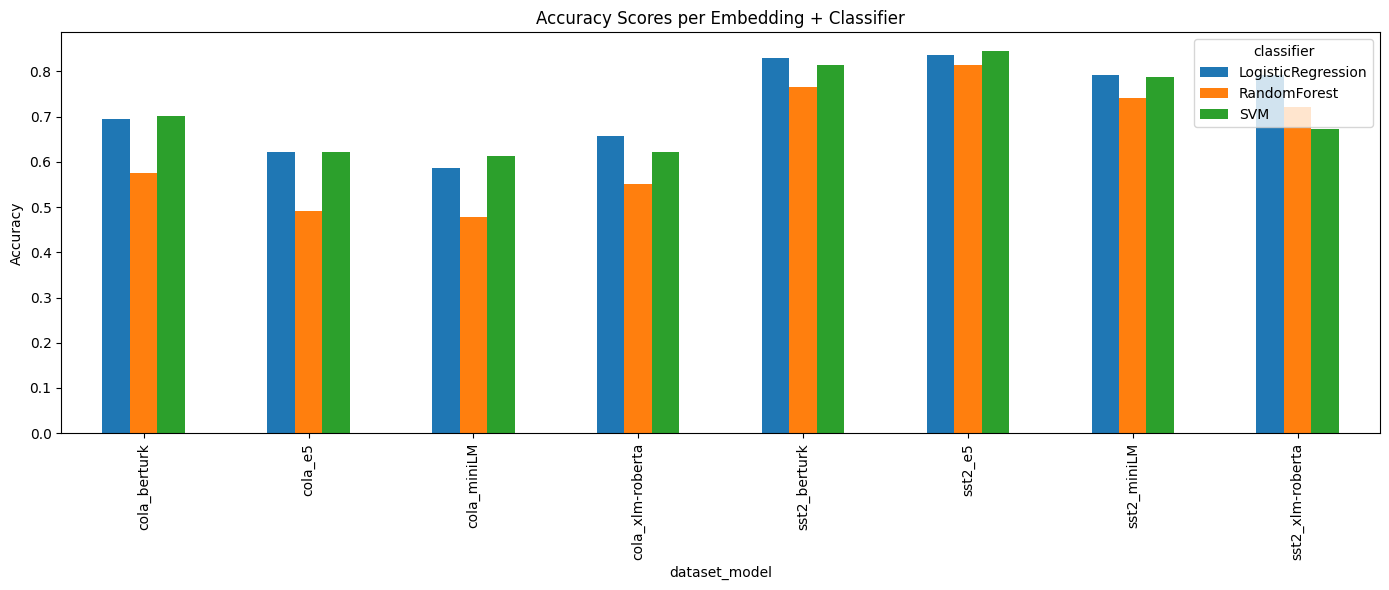

In [2]:
# TrGLUE: cola ve sst2 üzerinde embedding + sınıflandırma

# 1. Gereken kütüphaneleri yükle
!pip install -q datasets sentence-transformers scikit-learn

# 2. Veriyi Yükle
from datasets import load_dataset
cola = load_dataset("turkish-nlp-suite/TrGLUE", "cola")
sst2 = load_dataset("turkish-nlp-suite/TrGLUE", "sst2")

# 3. Veri alt kümelemesini yap
cola_train = cola['train'].shuffle(seed=42).select(range(5000))
cola_test = cola['test']

sst2_train = sst2['train'].shuffle(seed=42).select(range(5000))
sst2_test = sst2['test'].shuffle(seed=42).select(range(1000))

# 4. Embedding modellerini tanımla
from sentence_transformers import SentenceTransformer

models = {
    "berturk": SentenceTransformer("dbmdz/bert-base-turkish-cased"),
    #"jina": SentenceTransformer("jinaai/jina-embeddings-v3"),
    "e5": SentenceTransformer("intfloat/multilingual-e5-large-instruct"),
    "miniLM": SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"),
    "xlm-roberta": SentenceTransformer("xlm-roberta-base")
}

# 5. Embedding hesaplama fonksiyonu
def embed_texts(model, texts, prefix=""):
    return model.encode([prefix + text for text in texts], show_progress_bar=True)

# 6. Değerlendirme fonksiyonu
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(X_train, y_train, X_test, y_test):
    classifiers = {
        "RandomForest": RandomForestClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "SVM": SVC()
    }
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results[name] = {
            "accuracy": acc,
            "report": classification_report(y_test, preds, output_dict=True)
        }
    return results

# 7. Tüm kombinasyonlar için döngü
from tqdm import tqdm

results = {}

for model_name, model in tqdm(models.items()):
    # cola için
    X_train = embed_texts(model, [ex["sentence"] for ex in cola_train], prefix=("query: " if model_name == "e5" else ""))
    X_test = embed_texts(model, [ex["sentence"] for ex in cola_test], prefix=("query: " if model_name == "e5" else ""))
    y_train = [ex["label"] for ex in cola_train]
    y_test = [ex["label"] for ex in cola_test]
    results[f"cola_{model_name}"] = evaluate_model(X_train, y_train, X_test, y_test)

    # sst2 için
    X_train = embed_texts(model, [ex["sentence"] for ex in sst2_train], prefix=("query: " if model_name == "e5" else ""))
    X_test = embed_texts(model, [ex["sentence"] for ex in sst2_test], prefix=("query: " if model_name == "e5" else ""))
    y_train = [ex["label"] for ex in sst2_train]
    y_test = [ex["label"] for ex in sst2_test]
    results[f"sst2_{model_name}"] = evaluate_model(X_train, y_train, X_test, y_test)

# 8. Sonuçları özetle ve görselleştir
import pandas as pd
import matplotlib.pyplot as plt

summary = []
for key, clf_results in results.items():
    for clf, metrics in clf_results.items():
        summary.append({
            "dataset_model": key,
            "classifier": clf,
            "accuracy": metrics["accuracy"]
        })

df = pd.DataFrame(summary)
df.pivot(index="dataset_model", columns="classifier", values="accuracy").plot(kind="bar", figsize=(14, 6))
plt.title("Accuracy Scores per Embedding + Classifier")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()
